In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from sklearn.linear_model import LogisticRegression

import numpy as np
import matplotlib.pyplot as plt

In [3]:
tmp_data = pd.read_csv("temp_data.csv")

In [4]:
x = tmp_data["Time"].to_numpy()
x = x.reshape(-1, 1)

# print(x)


y = tmp_data["Temperature"].to_numpy()
# print(y)

In [5]:
model_ln = LinearRegression()
model_dr = DecisionTreeRegressor()
model_fr = RandomForestRegressor()

In [6]:
model_ln.fit(x, y)
model_dr.fit(x, y)
model_fr.fit(x, y)

RandomForestRegressor()

In [7]:
start_value = 734122
gap = 30

# Create the array
x_pre = np.arange(start_value, start_value + 60 * gap, gap)
x_pre = x_pre.reshape(-1, 1)
# x_pre = np.concatenate((x, x_pre))
# print(x_pre)

In [8]:
y_pre_ln = model_ln.predict(x_pre)
y_pre_dr = model_dr.predict(x_pre)
y_pre_fr = model_fr.predict(x_pre)
y_pre_log = model_fr.predict(x_pre)
# print(f"predicted response:\n{y_pred}")

In [9]:
# Defining a simple neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer with one neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x, y, epochs=5)  # Adjust the number of epochs as needed

# Make predictions
y_pre_neural = model.predict(x_pre)
# print(y_pre_neural)


Epoch 1/5
53/53 [==============================] - 2s 4ms/step - loss: 78831736.0000
Epoch 2/5
53/53 [==============================] - 0s 4ms/step - loss: 302520.4062
Epoch 3/5
53/53 [==============================] - 0s 4ms/step - loss: 1367.4351
Epoch 4/5
53/53 [==============================] - 0s 3ms/step - loss: 6.2991
Epoch 5/5
2/2 [==============================] - 0s 0s/step


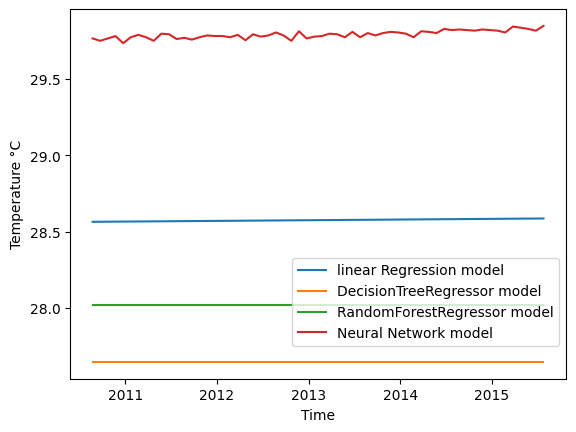

In [10]:
# Create the plot
plt.show()
# print(x_pre)

# plt.plot(x, y, label='temperature_upto_2010')
plt.plot((x_pre-734250)/360+2011, y_pre_ln, label='linear Regression model')
plt.plot((x_pre-734250)/360+2011, y_pre_dr, label='DecisionTreeRegressor model')
plt.plot((x_pre-734250)/360+2011, y_pre_fr, label='RandomForestRegressor model')
plt.plot((x_pre-734250)/360+2011, y_pre_neural, label='Neural Network model')
# plt.axvline(x=734122, c='r', linestyle='--',label='upto 2015')

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('Temperature °C')
plt.legend(loc='lower right',bbox_to_anchor = [1,0.07])

# Display the plot